In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [7]:
symbol = 'GOOGL'
data = yf.download(symbol, start='2014-01-01', end='2024-01-01')

[*********************100%***********************]  1 of 1 completed


In [8]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.914413,27.971722,27.734234,27.855856,27.787050,72783144
2014-01-03,27.902903,27.951200,27.650902,27.652653,27.584349,66601332
2014-01-06,27.853104,27.999498,27.688688,27.960960,27.891895,70701228
2014-01-07,28.153152,28.520771,28.057056,28.500000,28.429604,102001896
2014-01-08,28.678679,28.711712,28.360611,28.559309,28.488768,89610300
...,...,...,...,...,...,...
2023-12-22,140.770004,141.990005,140.710007,141.490005,141.140518,26514600
2023-12-26,141.589996,142.679993,141.190002,141.520004,141.170441,16780300
2023-12-27,141.589996,142.080002,139.889999,140.369995,140.023270,19628600


In [9]:
nan_per_column = data.isna().sum()
print(nan_per_column)

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


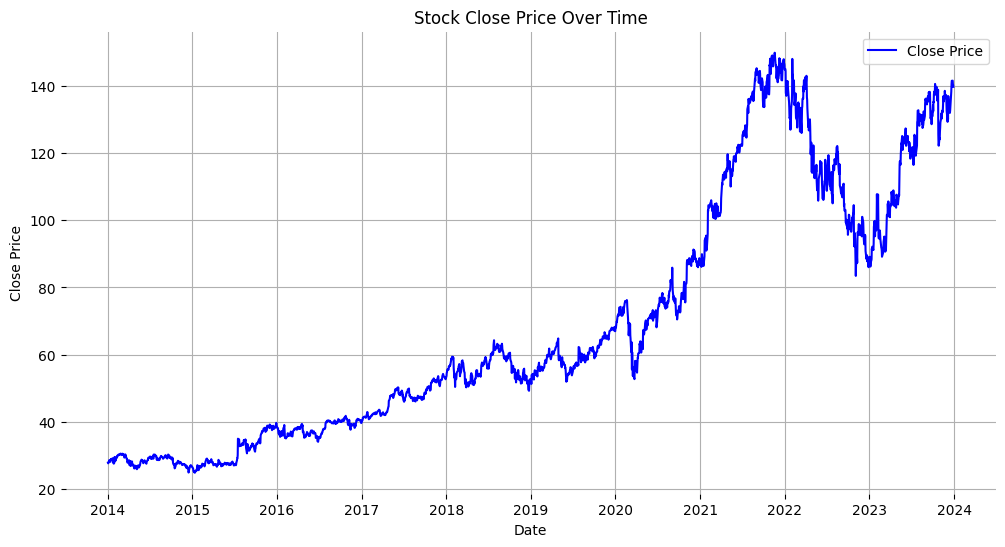

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')

plt.title('Stock Close Price Over Time', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Price', fontsize=10)

plt.grid(True)
plt.legend()
plt.box(False)

plt.show()

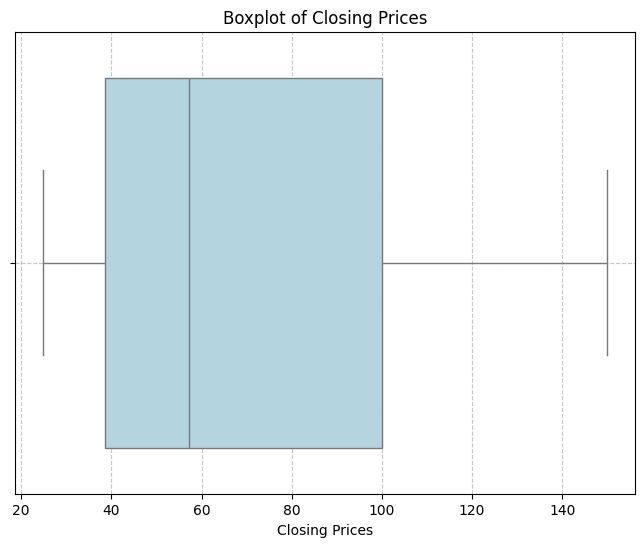

In [11]:
plt.figure(figsize=(8, 6))

sns.boxplot(
    x=data['Close'], 
    color='lightblue', 
    flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
)

plt.title('Boxplot of Closing Prices', fontsize=12)
plt.xlabel('Closing Prices', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

### Moving Average

In [12]:
data["10_Day_MA"] = data['Close'].rolling(window=10).mean()
data["25_Day_MA"] = data['Close'].rolling(window=25).mean()
data["50_Day_MA"] = data['Close'].rolling(window=50).mean()
data

,Open,High,Low,Close,Adj Close,Volume,10_Day_MA,25_Day_MA,50_Day_MA
Date,,,,,,,,,
2014-01-02,27.914413,27.971722,27.734234,27.855856,27.787050,72783144,NaN,NaN,NaN
2014-01-03,27.902903,27.951200,27.650902,27.652653,27.584349,66601332,NaN,NaN,NaN
2014-01-06,27.853104,27.999498,27.688688,27.960960,27.891895,70701228,NaN,NaN,NaN
2014-01-07,28.153152,28.520771,28.057056,28.500000,28.429604,102001896,NaN,NaN,NaN
2014-01-08,28.678679,28.711712,28.360611,28.559309,28.488768,89610300,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-12-22,140.770004,141.990005,140.710007,141.490005,141.140518,26514600,135.562001,134.980801,133.442201
2023-12-26,141.589996,142.679993,141.190002,141.520004,141.170441,16780300,136.385002,135.229202,133.525401
2023-12-27,141.589996,142.080002,139.889999,140.369995,140.023270,19628600,137.170001,135.394001,133.550800


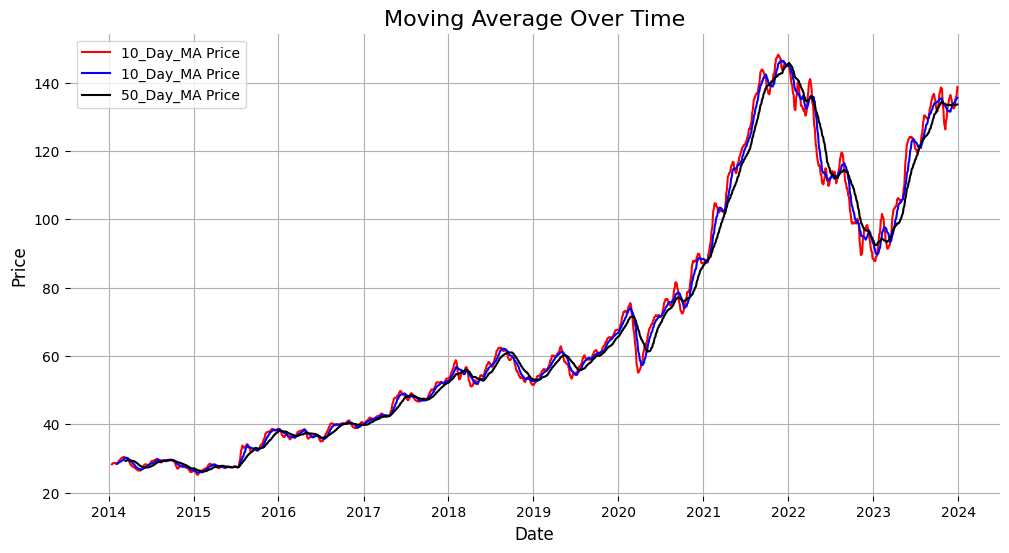

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['10_Day_MA'], label='10_Day_MA Price', color='red')
plt.plot(data.index, data['25_Day_MA'], label='10_Day_MA Price', color='blue')
plt.plot(data.index, data['50_Day_MA'], label='50_Day_MA Price', color='black')

plt.title('Moving Average Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)

plt.grid(True)
plt.legend()
plt.box(False)

plt.show()

In [14]:
nan_per_column = data.isna().sum()
print(nan_per_column)

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
10_Day_MA     9
25_Day_MA    24
50_Day_MA    49
dtype: int64


### Technical Indicators

In [15]:
def rsi(data, window=10):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [16]:
data['RSI'] = rsi(data)

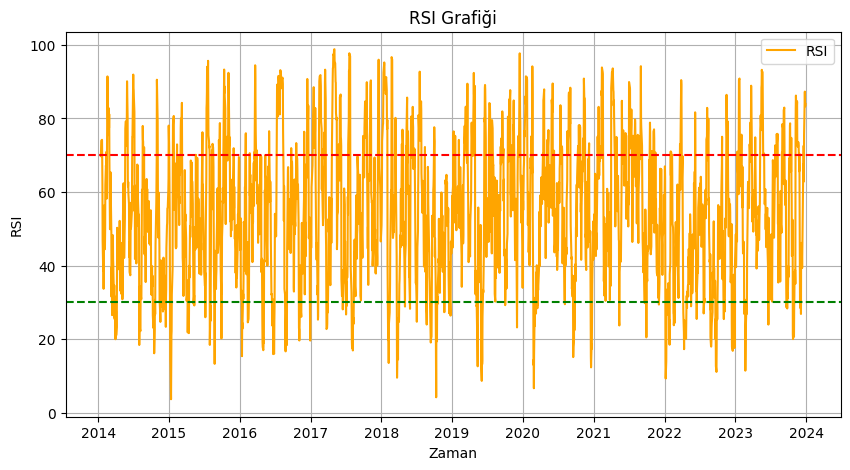

In [19]:
plt.figure(figsize=(10, 5))

plt.plot(data['RSI'], color='orange', label='RSI')

plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI Grafiği')
plt.ylabel('RSI')
plt.xlabel('Zaman')

plt.legend()
plt.grid(True)

plt.show()

#### MACD

In [20]:
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()

    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()

    return macd, signal_line


In [21]:
data['MACD'], data['Signal Line'] = calculate_macd(data)

#### Standard Deviation

In [22]:
def calculate_volatility(data, window=14):
    return data['Close'].rolling(window=window).std()

In [23]:
data['Volatility'] = calculate_volatility(data)

In [24]:
data

,Open,High,Low,Close,Adj Close,Volume,10_Day_MA,25_Day_MA,50_Day_MA,RSI,MACD,Signal Line,Volatility
Date,,,,,,,,,,,,,
2014-01-02,27.914413,27.971722,27.734234,27.855856,27.787050,72783144,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
2014-01-03,27.902903,27.951200,27.650902,27.652653,27.584349,66601332,NaN,NaN,NaN,NaN,-0.016210,-0.003242,NaN
2014-01-06,27.853104,27.999498,27.688688,27.960960,27.891895,70701228,NaN,NaN,NaN,NaN,-0.004131,-0.003420,NaN
2014-01-07,28.153152,28.520771,28.057056,28.500000,28.429604,102001896,NaN,NaN,NaN,NaN,0.048380,0.006940,NaN
2014-01-08,28.678679,28.711712,28.360611,28.559309,28.488768,89610300,NaN,NaN,NaN,NaN,0.093701,0.024292,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,140.770004,141.990005,140.710007,141.490005,141.140518,26514600,135.562001,134.980801,133.442201,75.590527,1.450285,0.586784,3.514506
2023-12-26,141.589996,142.679993,141.190002,141.520004,141.170441,16780300,136.385002,135.229202,133.525401,87.307398,1.749090,0.819245,3.734087
2023-12-27,141.589996,142.080002,139.889999,140.369995,140.023270,19628600,137.170001,135.394001,133.550800,84.399552,1.871526,1.029701,3.554236


In [25]:
nan_per_column = data.isna().sum()
print(nan_per_column)

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
10_Day_MA       9
25_Day_MA      24
50_Day_MA      49
RSI             9
MACD            0
Signal Line     0
Volatility     13
dtype: int64


In [26]:
data['10_Day_MA'].fillna(data['Close'])

Date
2014-01-02     27.855856
2014-01-03     27.652653
2014-01-06     27.960960
2014-01-07     28.500000
2014-01-08     28.559309
                 ...    
2023-12-22    135.562001
2023-12-26    136.385002
2023-12-27    137.170001
2023-12-28    137.936000
2023-12-29    138.711000
Name: 10_Day_MA, Length: 2516, dtype: float64

In [27]:
mean_rsi = data['RSI'].mean()
data['RSI'] = data['RSI'].fillna(mean_rsi)

In [28]:
mean_vol = data['Volatility'].mean()
data['Volatility'] = data['Volatility'].fillna(mean_vol)

In [29]:
nan_per_column = data.isna().sum()
print(nan_per_column)

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
10_Day_MA       9
25_Day_MA      24
50_Day_MA      49
RSI             0
MACD            0
Signal Line     0
Volatility      0
dtype: int64


In [30]:
data

,Open,High,Low,Close,Adj Close,Volume,10_Day_MA,25_Day_MA,50_Day_MA,RSI,MACD,Signal Line,Volatility
Date,,,,,,,,,,,,,
2014-01-02,27.914413,27.971722,27.734234,27.855856,27.787050,72783144,NaN,NaN,NaN,54.534517,0.000000,0.000000,1.637274
2014-01-03,27.902903,27.951200,27.650902,27.652653,27.584349,66601332,NaN,NaN,NaN,54.534517,-0.016210,-0.003242,1.637274
2014-01-06,27.853104,27.999498,27.688688,27.960960,27.891895,70701228,NaN,NaN,NaN,54.534517,-0.004131,-0.003420,1.637274
2014-01-07,28.153152,28.520771,28.057056,28.500000,28.429604,102001896,NaN,NaN,NaN,54.534517,0.048380,0.006940,1.637274
2014-01-08,28.678679,28.711712,28.360611,28.559309,28.488768,89610300,NaN,NaN,NaN,54.534517,0.093701,0.024292,1.637274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,140.770004,141.990005,140.710007,141.490005,141.140518,26514600,135.562001,134.980801,133.442201,75.590527,1.450285,0.586784,3.514506
2023-12-26,141.589996,142.679993,141.190002,141.520004,141.170441,16780300,136.385002,135.229202,133.525401,87.307398,1.749090,0.819245,3.734087
2023-12-27,141.589996,142.080002,139.889999,140.369995,140.023270,19628600,137.170001,135.394001,133.550800,84.399552,1.871526,1.029701,3.554236


In [31]:
train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

X_train = train_data.drop(columns=['Close', 'Adj Close', '25_Day_MA', '50_Day_MA', 'Signal Line'])
y_train = train_data['Close']

X_test = test_data.drop(columns=['Close', 'Adj Close', '25_Day_MA', '50_Day_MA', 'Signal Line'])
y_test = test_data['Close']

In [32]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2012, 8)
y_train shape:  (2012,)
X_test shape:  (504, 8)
y_test shape:  (504,)


In [33]:
print("Train data dates:", train_data.index)
print("Test data dates:", test_data.index)

Train data dates: DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
               '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23',
               '2021-12-27', '2021-12-28'],
              dtype='datetime64[ns]', name='Date', length=2012, freq=None)
Test data dates: DatetimeIndex(['2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03',
               '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-10', '2022-01-11',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)


In [34]:
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [35]:
y_pred = model.predict(X_test)

In [36]:
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1.9366731038169256
Mean Squared Error: 6.514329508187075
Root Mean Squared Error: 2.5523184574396423


In [37]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.sort_index(inplace=True)

In [38]:
results.head(10)

,Actual,Predicted
Date,,
2021-12-29,146.654999,146.806656
2021-12-30,146.200500,146.387527
2021-12-31,144.852005,146.401215
2022-01-03,144.991501,145.690918
2022-01-04,144.399506,146.822617
2022-01-05,137.774994,140.338760
2022-01-06,137.747498,137.642258
2022-01-07,137.016998,136.289917
2022-01-10,138.669495,131.940582


In [39]:
results.tail(10)

,Actual,Predicted
Date,,
2023-12-15,132.600006,132.215469
2023-12-18,135.800003,133.179901
2023-12-19,136.649994,137.845291
2023-12-20,138.339996,139.985504
2023-12-21,140.419998,139.031815
2023-12-22,141.490005,141.643509
2023-12-26,141.520004,141.992355
2023-12-27,140.369995,142.393524
2023-12-28,140.229996,142.567932


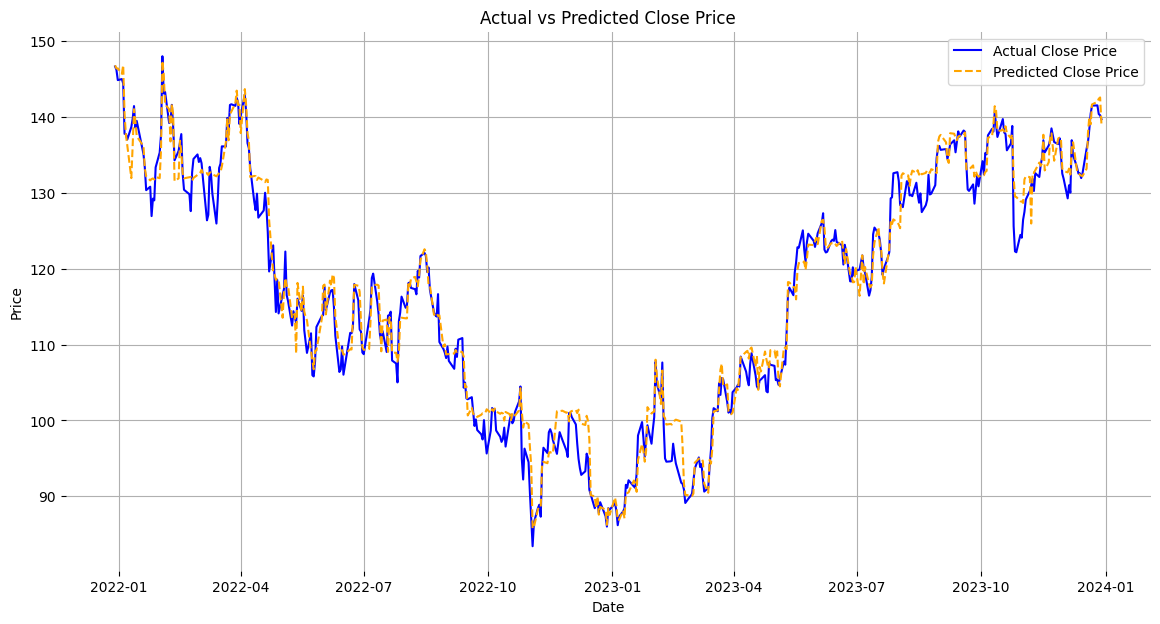

In [40]:
plt.figure(figsize=(14, 7))
plt.plot(results.index, results['Actual'], label='Actual Close Price', color='blue')
plt.plot(results.index, results['Predicted'], label='Predicted Close Price', color='orange',  linestyle='--')

plt.title('Actual vs Predicted Close Price', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)

plt.legend()
plt.grid()
plt.box(False)

plt.show()

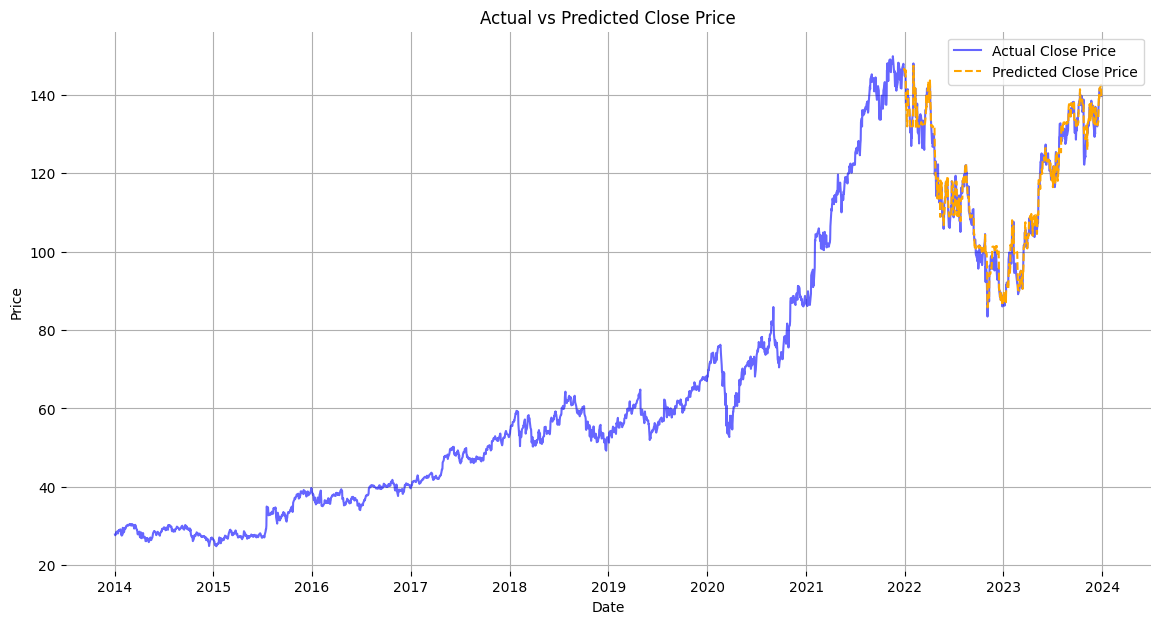

In [41]:
plt.figure(figsize=(14, 7))

plt.plot(data.index, data['Close'], label='Actual Close Price', color='blue', alpha=0.6)
plt.plot(results.index, results['Predicted'], label='Predicted Close Price', color='orange', linestyle='--')

plt.title('Actual vs Predicted Close Price', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)

plt.legend()
plt.grid()
plt.box(False)

plt.show()